# Effect of healthcare quality on happiness


### World Happiness Index Data Cleanup
* Datasource: The World Happiness Report, for years 2015-17.
* Final data represents average happiness score, economy, and life expectancy for each country in 2015-17. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data2015 = pd.read_csv("2015.csv")
data2016 = pd.read_csv("2016.csv")
data2017 = pd.read_csv("2017.csv")

data2015_c = data2015[["Country", "Region", "Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", "Health (Life Expectancy)"]]
data2015_c.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy)
0,Switzerland,Western Europe,1,7.587,1.39651,0.94143
1,Iceland,Western Europe,2,7.561,1.30232,0.94784
2,Denmark,Western Europe,3,7.527,1.32548,0.87464
3,Norway,Western Europe,4,7.522,1.45900,0.88521
4,Canada,North America,5,7.427,1.32629,0.90563


In [3]:
data2016_c = data2016[["Country", "Region", "Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", "Health (Life Expectancy)"]]
data2016_c.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy)
0,Denmark,Western Europe,1,7.526,1.44178,0.79504
1,Switzerland,Western Europe,2,7.509,1.52733,0.86303
2,Iceland,Western Europe,3,7.501,1.42666,0.86733
3,Norway,Western Europe,4,7.498,1.57744,0.79579
4,Finland,Western Europe,5,7.413,1.40598,0.81091


In [4]:
data2017_c = data2017[["Country", "Happiness.Rank", "Happiness.Score", "Economy..GDP.per.Capita.","Health..Life.Expectancy."]]
data2017_c = data2017_c.rename(columns={"Happiness.Rank":"Happiness Rank",
                                       "Happiness.Score": "Happiness Score",
                                       "Economy..GDP.per.Capita.": "Economy (GDP per Capita)",
                                        "Health..Life.Expectancy.": "Health (Life Expectancy)"})
data2017_c.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy)
0,Norway,1,7.537,1.616463,0.796667
1,Denmark,2,7.522,1.482383,0.792566
2,Iceland,3,7.504,1.480633,0.833552
3,Switzerland,4,7.494,1.564980,0.858131
4,Finland,5,7.469,1.443572,0.809158


In [5]:
#Merging datasets from years 2015, 2016, 2017
combined_happiness = pd.merge(data2015_c, data2016_c, on="Country", how = "left")
combined_happiness = pd.merge(combined_happiness, data2017_c, on="Country", how = "left")
combined_happiness.head()

,Country,Region_x,Happiness Rank_x,Happiness Score_x,Economy (GDP per Capita)_x,Health (Life Expectancy)_x,Region_y,Happiness Rank_y,Happiness Score_y,Economy (GDP per Capita)_y,Health (Life Expectancy)_y,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy)
0,Switzerland,Western Europe,1,7.587,1.39651,0.94143,Western Europe,2.0,7.509,1.52733,0.86303,4.0,7.494,1.564980,0.858131
1,Iceland,Western Europe,2,7.561,1.30232,0.94784,Western Europe,3.0,7.501,1.42666,0.86733,3.0,7.504,1.480633,0.833552
2,Denmark,Western Europe,3,7.527,1.32548,0.87464,Western Europe,1.0,7.526,1.44178,0.79504,2.0,7.522,1.482383,0.792566
3,Norway,Western Europe,4,7.522,1.45900,0.88521,Western Europe,4.0,7.498,1.57744,0.79579,1.0,7.537,1.616463,0.796667
4,Canada,North America,5,7.427,1.32629,0.90563,North America,6.0,7.404,1.44015,0.82760,7.0,7.316,1.479204,0.834558


In [6]:
#Calculate average happiness, GDP, and life expectancy over three years

combined_happiness["Average Happiness"]=combined_happiness.loc[:, ["Happiness Score_x", "Happiness Score_y", "Happiness Score"]].mean(axis=1)
combined_happiness["Average GDP (per capita)"]=combined_happiness.loc[:, ["Economy (GDP per Capita)_x", "Economy (GDP per Capita)_y", "Economy (GDP per Capita)"]].mean(axis=1)
combined_happiness["Average Health (Life Expectancy)"]=combined_happiness.loc[:, ["Health (Life Expectancy)_x", "Health (Life Expectancy)_y", "Health (Life Expectancy)"]].mean(axis=1)

combined_happiness.head()

,Country,Region_x,Happiness Rank_x,Happiness Score_x,Economy (GDP per Capita)_x,Health (Life Expectancy)_x,Region_y,Happiness Rank_y,Happiness Score_y,Economy (GDP per Capita)_y,Health (Life Expectancy)_y,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Average Happiness,Average GDP (per capita),Average Health (Life Expectancy)
0,Switzerland,Western Europe,1,7.587,1.39651,0.94143,Western Europe,2.0,7.509,1.52733,0.86303,4.0,7.494,1.564980,0.858131,7.530000,1.496273,0.887530
1,Iceland,Western Europe,2,7.561,1.30232,0.94784,Western Europe,3.0,7.501,1.42666,0.86733,3.0,7.504,1.480633,0.833552,7.522000,1.403204,0.882907
2,Denmark,Western Europe,3,7.527,1.32548,0.87464,Western Europe,1.0,7.526,1.44178,0.79504,2.0,7.522,1.482383,0.792566,7.525000,1.416548,0.820749
3,Norway,Western Europe,4,7.522,1.45900,0.88521,Western Europe,4.0,7.498,1.57744,0.79579,1.0,7.537,1.616463,0.796667,7.519000,1.550968,0.825889
4,Canada,North America,5,7.427,1.32629,0.90563,North America,6.0,7.404,1.44015,0.82760,7.0,7.316,1.479204,0.834558,7.382333,1.415215,0.855929


In [7]:
# Data clean up
happiness_cleaned = combined_happiness[["Happiness Rank_x","Country", "Region_x", "Average Happiness", "Average GDP (per capita)", "Average Health (Life Expectancy)"]]
happiness_cleaned=happiness_cleaned.rename(columns={"Happiness Rank_x":"Happiness Rank",
                                                    "Region_x": "Region"})

happiness_cleaned.head()

,Happiness Rank,Country,Region,Average Happiness,Average GDP (per capita),Average Health (Life Expectancy)
0,1,Switzerland,Western Europe,7.530000,1.496273,0.887530
1,2,Iceland,Western Europe,7.522000,1.403204,0.882907
2,3,Denmark,Western Europe,7.525000,1.416548,0.820749
3,4,Norway,Western Europe,7.519000,1.550968,0.825889
4,5,Canada,North America,7.382333,1.415215,0.855929


### World Medical Expense Data Cleanup
* World medical expense datasource: World Bank Online Database

In [8]:
healthcare = pd.read_csv("Healthcare_cost.csv")

#Drop rows with NaN values
healthcare = healthcare.dropna(how='any')

#Clean up rows
healthcare = healthcare.drop("Indicator Name", axis=1)
healthcare.head()

,Country Name,Country Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1,Afghanistan,AFG,9.948289,10.622766,9.904674,10.256496,9.818487,8.569671,8.561907,7.897168,8.805964,9.652356,10.297595
2,Angola,AGO,3.976992,3.600971,3.216291,3.499375,3.584522,2.741499,2.843139,2.664953,2.992699,2.799603,2.946978
3,Albania,ALB,6.342830,5.932672,6.129000,5.582805,5.102306,5.034761,5.634350,5.860722,6.343861,6.956532,6.824439
4,Andorra,AND,9.778755,9.713320,9.808338,10.432809,10.895869,11.566204,11.825641,12.090213,14.158376,12.030786,11.974776
5,Arab World,ARB,3.497051,3.471659,3.563069,3.379315,4.384158,3.971062,3.947312,4.078136,4.243065,4.517421,4.896603


In [9]:
#Compute average medical expenditure from 2005-2015 (%GDP)
healthcare["Avg Med Expense (%GDP)"] = healthcare[healthcare.columns].mean(axis=1)

#Final dataframe
healthcare_cleaned = healthcare[["Country Name", "Avg Med Expense (%GDP)"]]
healthcare_cleaned = healthcare_cleaned.dropna(how='any')
healthcare_cleaned.head()

,Country Name,Avg Med Expense (%GDP)
1,Afghanistan,9.485034
2,Angola,3.169729
3,Albania,5.976753
4,Andorra,11.297735
5,Arab World,3.995350


In [10]:
#Merge happiness data and health expenditure data
#Remove duplicated items and extra country name column
main = pd.merge(happiness_cleaned, healthcare_cleaned, how = "left", left_on="Country", right_on="Country Name")
main.drop_duplicates()
del main["Country Name"]
main.head()

,Happiness Rank,Country,Region,Average Happiness,Average GDP (per capita),Average Health (Life Expectancy),Avg Med Expense (%GDP)
0,1,Switzerland,Western Europe,7.530000,1.496273,0.887530,10.684475
1,2,Iceland,Western Europe,7.522000,1.403204,0.882907,8.805395
2,3,Denmark,Western Europe,7.525000,1.416548,0.820749,9.946544
3,4,Norway,Western Europe,7.519000,1.550968,0.825889,8.733094
4,5,Canada,North America,7.382333,1.415215,0.855929,9.922895


### Healthcare Resources Data Cleanup
* Datasource: world bank

In [11]:
#Read and clean up data 

healthdata= pd.read_csv("healthdata.csv")
healthdata.dropna(how='any')
healthdata=healthdata.drop([0,1,2], axis=0).reset_index()
healthdata.columns=healthdata.iloc[0]
healthdata.reindex(healthdata.index.drop(0))
healthdata=healthdata.drop([0], axis=0).reset_index()
healthdata=healthdata.drop(columns="index")
healthdata=healthdata.drop(columns=3)

healthdata.head()

,Country Name,Country Code,Indicator Name,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
0,Aruba,ABW,"Population, male (% of total)",47.560683,47.540886,47.556903,47.60453,47.648572,47.671273,47.670374,47.647735,47.609819,47.572208,47.534479,47.508515,47.482329
1,Aruba,ABW,"Population, male",47575.000000,47936.000000,48137.000000,48249.00000,48341.000000,48467.000000,48649.000000,48876.000000,49127.000000,49378.000000,49598.000000,49799.000000,49982.000000
2,Aruba,ABW,"Population, female (% of total)",52.439317,52.459114,52.443096,52.39547,52.351428,52.328727,52.329626,52.352265,52.390181,52.427792,52.465521,52.491485,52.517671
3,Aruba,ABW,"Population, female",52456.000000,52896.000000,53083.000000,53104.00000,53112.000000,53202.000000,53404.000000,53701.000000,54060.000000,54417.000000,54743.000000,55023.000000,55282.000000
4,Aruba,ABW,"Population, total",100031.000000,100832.000000,101220.000000,101353.00000,101453.000000,101669.000000,102053.000000,102577.000000,103187.000000,103795.000000,104341.000000,104822.000000,105264.000000


In [12]:
#Select only data from 2015-17 to match happiness index dataset

healthdata=healthdata[["Country Name","Indicator Name", 2015.0, 2016.0, 2017.0]]
healthdata.round(2)
healthdata = healthdata.rename(columns={2015.0:"2015",
                                       2016.0:"2016",
                                       2017.0:"2017"})
healthdata.head()

,Country Name,Indicator Name,2015,2016,2017
0,Aruba,"Population, male (% of total)",47.534479,47.508515,47.482329
1,Aruba,"Population, male",49598.000000,49799.000000,49982.000000
2,Aruba,"Population, female (% of total)",52.465521,52.491485,52.517671
3,Aruba,"Population, female",54743.000000,55023.000000,55282.000000
4,Aruba,"Population, total",104341.000000,104822.000000,105264.000000


In [13]:
#Compute average over 2015-2017
healthdata["Sum"]= healthdata.loc[:, "2015":"2017"].sum(axis=1)
healthdata.head()

,Country Name,Indicator Name,2015,2016,2017,Sum
0,Aruba,"Population, male (% of total)",47.534479,47.508515,47.482329,142.525323
1,Aruba,"Population, male",49598.000000,49799.000000,49982.000000,149379.000000
2,Aruba,"Population, female (% of total)",52.465521,52.491485,52.517671,157.474677
3,Aruba,"Population, female",54743.000000,55023.000000,55282.000000,165048.000000
4,Aruba,"Population, total",104341.000000,104822.000000,105264.000000,314427.000000


In [14]:
#Create new dataframe for groups of interest
#Number is per 1000 people in the population

physicians = healthdata.loc[healthdata["Indicator Name"]=="Physicians (per 1,000 people)"]
physicians = physicians.fillna(0)
physicians = physicians[["Country Name", "Sum"]]
physicians = physicians.rename(columns={"Country Name": "Country",
                                        "Sum": "Number of physicians"})

nurses = healthdata.loc[healthdata["Indicator Name"]=="Nurses and midwives (per 1,000 people)"]
nurses = nurses.fillna(0)
nurses = nurses[["Country Name", "Sum"]]
nurses = nurses.rename(columns={"Country Name": "Country",
                                "Sum": "Number of nurses and midwives"})

healthworkers = healthdata.loc[healthdata["Indicator Name"]=='Community health workers (per 1,000 people)']
healthworkers = healthworkers.fillna(0)
healthworkers = healthworkers[["Country Name", "Sum"]]
healthworkers = healthworkers.rename(columns={"Country Name": "Country",
                                              "Sum": "Number of community health workers"})

beds = healthdata.loc[healthdata["Indicator Name"]=='Hospital beds (per 1,000 people)']
beds = beds.fillna(0)
beds = beds[["Country Name", "Sum"]]
beds = beds.rename(columns={"Country Name": "Country",
                            "Sum": "Number of hospital beds"})


In [15]:
#Append to happiness dataframe
main=pd.merge(main, physicians, how='left', on = "Country")
main=pd.merge(main, nurses, how='left', on = "Country")
main=pd.merge(main, healthworkers, how='left', on = "Country")
main=pd.merge(main, beds, how='left', on = "Country")
main.head()

,Happiness Rank,Country,Region,Average Happiness,Average GDP (per capita),Average Health (Life Expectancy),Avg Med Expense (%GDP),Number of physicians,Number of nurses and midwives,Number of community health workers,Number of hospital beds
0,1,Switzerland,Western Europe,7.530000,1.496273,0.887530,10.684475,8.437,18.230,0.0,0.0
1,2,Iceland,Western Europe,7.522000,1.403204,0.882907,8.805395,3.791,31.528,0.0,0.0
2,3,Denmark,Western Europe,7.525000,1.416548,0.820749,9.946544,0.000,0.000,0.0,2.5
3,4,Norway,Western Europe,7.519000,1.550968,0.825889,8.733094,4.385,17.824,0.0,0.0
4,5,Canada,North America,7.382333,1.415215,0.855929,9.922895,2.539,9.842,0.0,0.0


In [16]:
#Save the cleaned up data to csv
main.to_csv("Maindata_cleaned.csv", encoding="utf-8", index=False)

## Data Analysis & Visualization

### Happiness by World Region 2015-17 

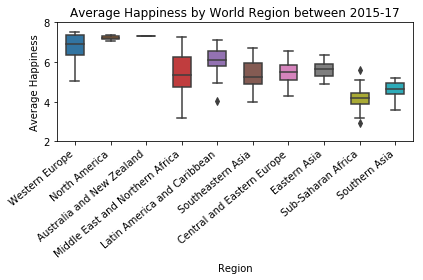

In [17]:
bxplot= sns.boxplot(x="Region",y="Average Happiness", data= happiness_cleaned, width =0.5)
#bxplot= sns.stripplot(x="Region",y="Average Happiness", data= happiness_cleaned, jitter=True, marker='o', alpha = 0.3)
bxplot.set_xticklabels(bxplot.get_xticklabels(), rotation=40, ha="right")

plt.ylim(2,8)
plt.title("Average Happiness by World Region between 2015-17")

plt.tight_layout()

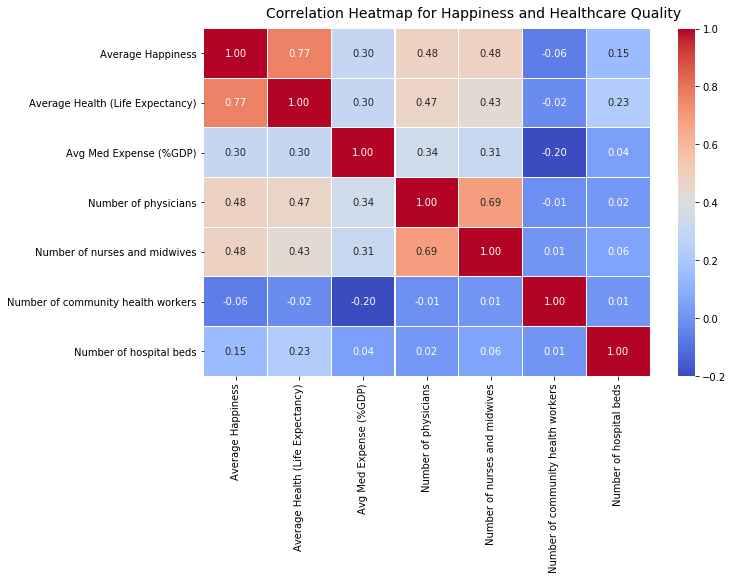

In [18]:
main1 = main.drop(["Happiness Rank", "Average GDP (per capita)"],axis=1)

f, ax = plt.subplots(figsize=(10, 6))
corr = main1.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap for Happiness and Healthcare Quality', fontsize=14)

Text(0.5, 1.0, 'Average Medical Expenses vs. Happiness')

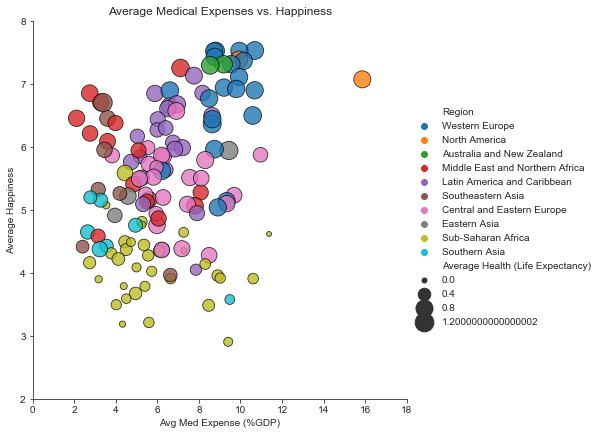

In [19]:
import seaborn as sns
sns.set_style("ticks")

ax = sns.relplot(x="Avg Med Expense (%GDP)", y="Average Happiness", 
            size = "Average Health (Life Expectancy)", sizes = (25,350),
            alpha = 0.8, linewidth=0.8, edgecolor='black',data=main, height=6, hue='Region')

plt.xlim(0,18)
plt.ylim(2,8)

plt.title("Average Medical Expenses vs. Happiness")
#plt.savefig("Avg med expense v happiness.png",bbox_inches= "tight")

Text(0.5, 1.0, 'Number of Physicians per 1,000 people vs. Happiness')

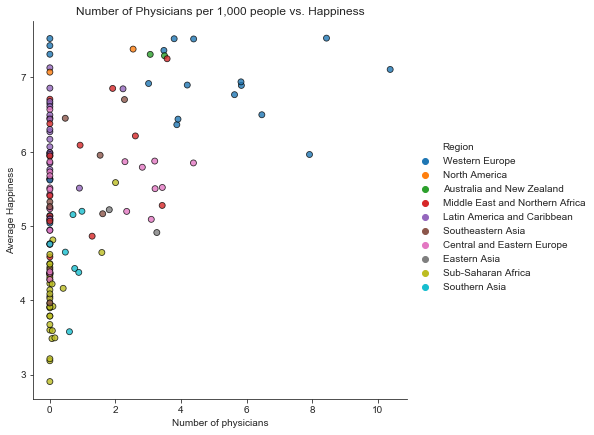

In [20]:
import seaborn as sns
sns.set_style("ticks")

ax = sns.relplot(x="Number of physicians", y="Average Happiness", sizes = (25,350),
            alpha = 0.8, linewidth=0.8, edgecolor='black',data=main, height=6, hue='Region')
plt.title("Number of Physicians per 1,000 people vs. Happiness")


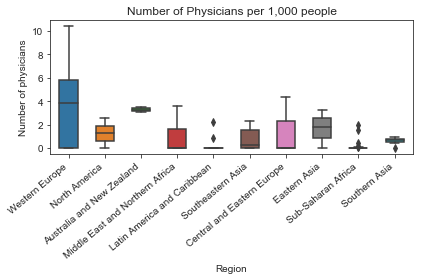

In [21]:
import seaborn as sns
bxplot= sns.boxplot(x="Region",y="Number of physicians", data= main, width =0.5)
#bxplot= sns.stripplot(x="Region",y="Average Happiness", data= happiness_cleaned, jitter=True, marker='o', alpha = 0.3)
bxplot.set_xticklabels(bxplot.get_xticklabels(), rotation=40, ha="right")

#plt.ylim(2,8)
plt.title("Number of Physicians per 1,000 people")

plt.tight_layout()

Text(0.5, 1.0, 'Number of nurses and midwives per 1,000 people vs. Happiness')

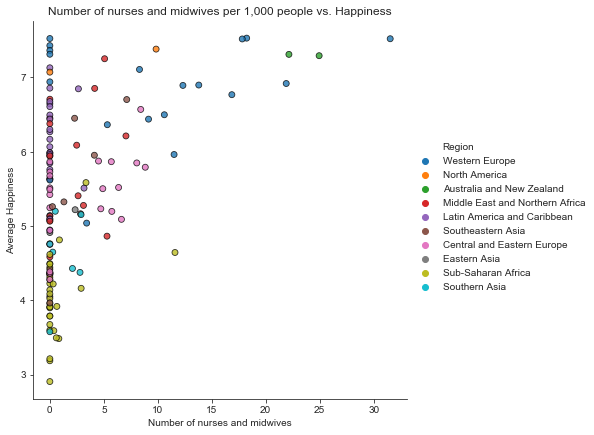

In [22]:
sns.set_style("ticks")

ax = sns.relplot(x="Number of nurses and midwives", y="Average Happiness", sizes = (25,350),
            alpha = 0.8, linewidth=0.8, edgecolor='black',data=main, height=6, hue='Region')

plt.title("Number of nurses and midwives per 1,000 people vs. Happiness")

Text(0.5, 1.0, 'Number of community health workers per 1,000 people vs. Happiness')

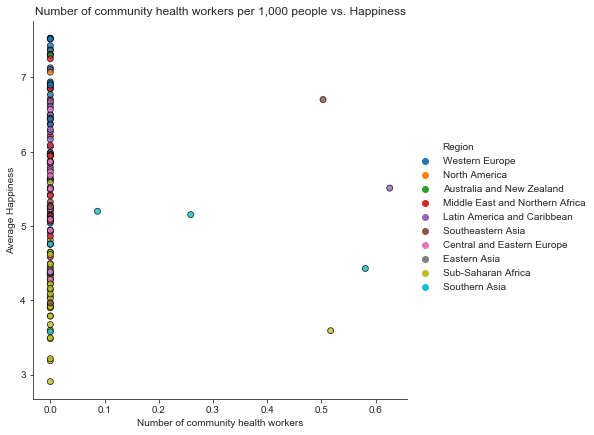

In [23]:
sns.set_style("ticks")

ax = sns.relplot(x="Number of community health workers", y="Average Happiness", sizes = (25,350),
            alpha = 0.8, linewidth=0.8, edgecolor='black',data=main, height=6, hue='Region')

plt.title("Number of community health workers per 1,000 people vs. Happiness")

Text(0.5, 1.0, 'Number of hospital beds per 1,000 people vs. Happiness')

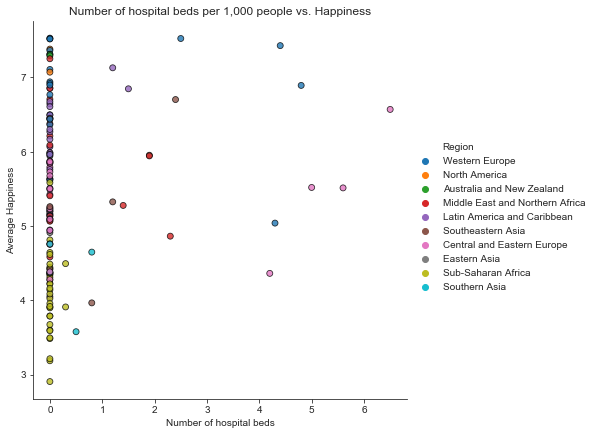

In [24]:
sns.set_style("ticks")

ax = sns.relplot(x="Number of hospital beds", y="Average Happiness", sizes = (25,350),
            alpha = 0.8, linewidth=0.8, edgecolor='black',data=main, height=6, hue='Region')

plt.title("Number of hospital beds per 1,000 people vs. Happiness")

